# **PRAKTIKUM 1**

## **Klasifikasi SVM dengan Data Dummy**

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

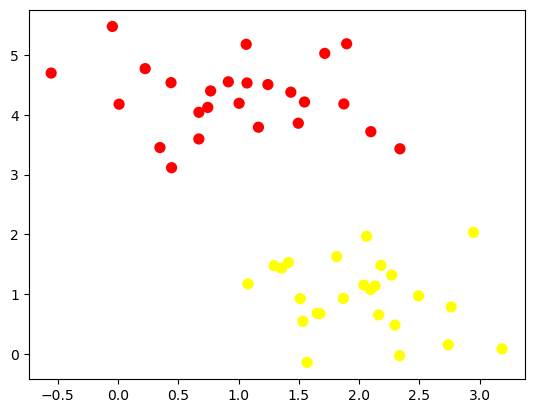

In [2]:
# memperlihatkan dua kelas yang telah terpisah pada data dummy
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

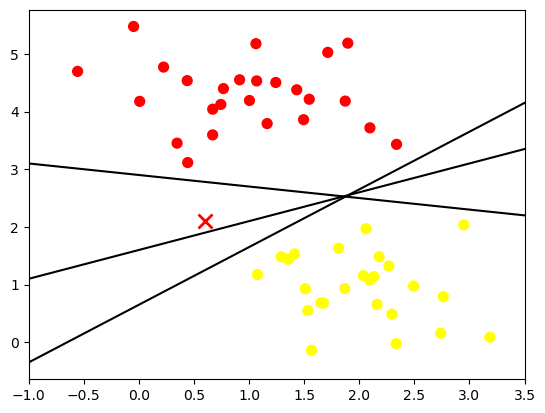

In [3]:
# membuat garis pemisah antar klasifikasi
xfit = np.linspace(-1,3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m* xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

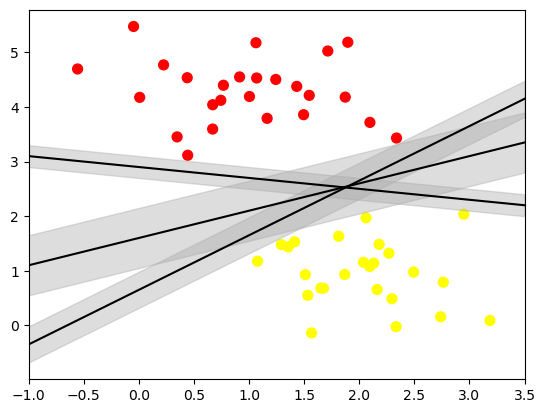

In [4]:
# menciptakan margin 
# untuk memperjelas posisi sebuah data terhadap label
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Penerapan Fitting SVM**

In [6]:
from sklearn.svm import SVC # Support Vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [13]:
# membuat sebuah fungsi untuk menampilkan fitting data
def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # membuat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # membuat plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-','--'])
    
    # membuat plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300, linewidth=1, facecolors='none');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

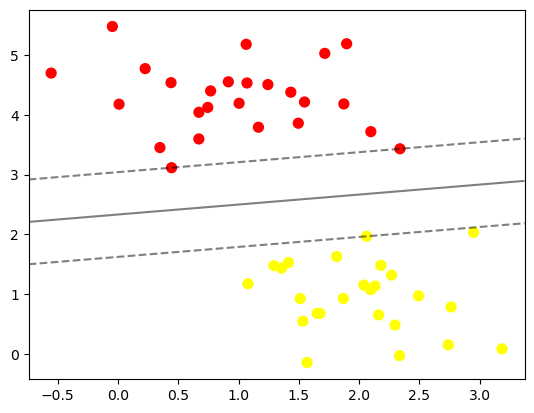

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
# mencari tahu data yang masuk
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

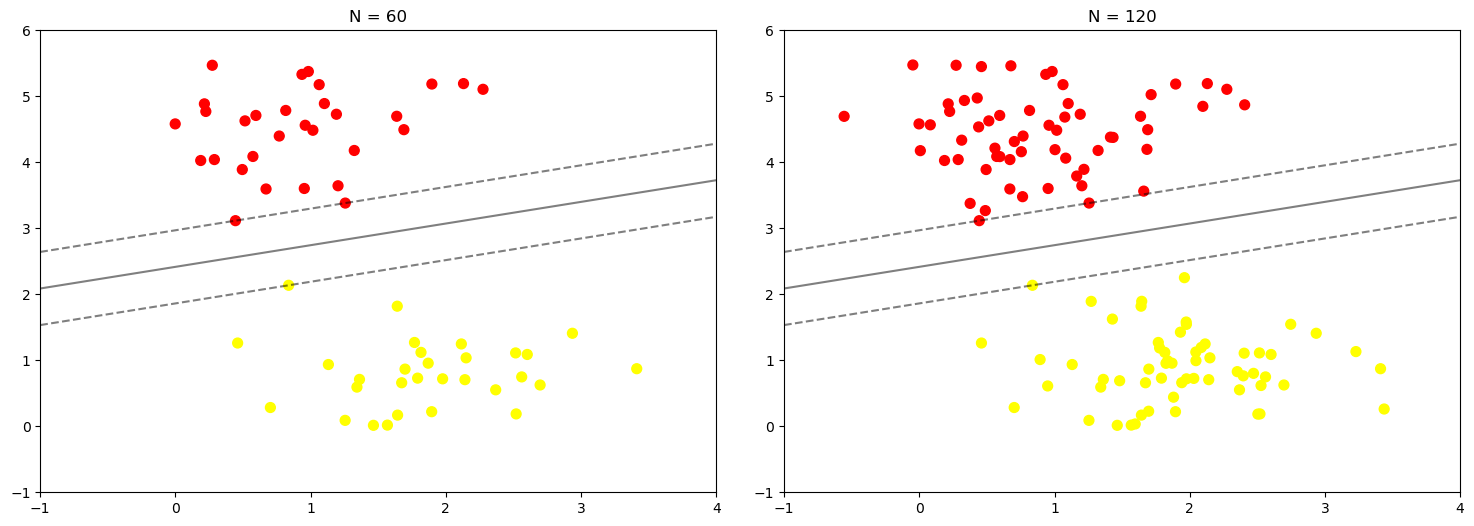

In [15]:
# membandingkan hasil dari 60 dan 120 data awal yang digunakan
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Data Tidak Terpisah Secara Linier**

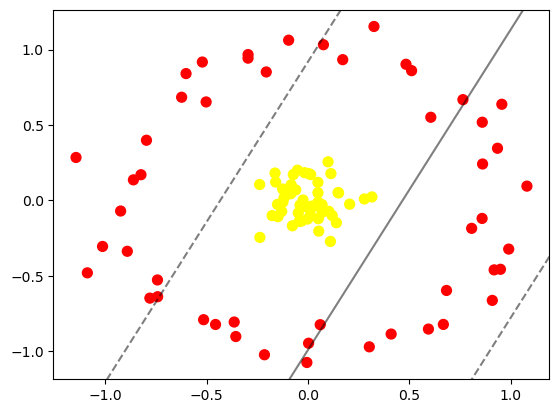

In [16]:
# menampilkan contoh data yang terpisah tidak secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [17]:
# melakukan proyeksi berbasis radial 
r = np.exp(-(X ** 2).sum(1))

In [24]:
# mengubah plot visualisasi menjadi model 3D
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.89202485, -0.33724187],
       [ 0.06008332, -0.82396707],
       [ 0.11283026,  0.17795226],
       [ 0.11041093, -0.27178246],
       [ 0.00265251, -0.94697873],
       [ 0.41013514, -0.88596938],
       [-0.11862524,  0.01744066],
       [ 0.0120905 , -0.09779244],
       [ 0.0029044 ,  0.17846383],
       [ 0.05067296, -0.12095776],
       [-0.02474009,  0.0028764 ],
       [-0.13013414, -0.07255215],
       [ 0.13979183, -0.14788903],
       [ 0.30227143, -0.97082097],
       [-0.82455292,  0.17043037],
       [ 0.15063644,  0.04969394],
       [-0.62384507,  0.68432862],
       [-0.74320576, -0.527323  ],
       [-0.00189315, -0.12330226],
       [ 0.04942756, -0.01096464],
       [-0.35654695, -0.90233402],
       [-0.00576681, -1.0745054 ],
       [ 0.0758305 ,  1.03245069],
       [ 0.93501743,  0.3459047 ],
       [-0.29603178,  0.96707464],
       [-0.05226265,  0.20050928],
       [ 0.069111  , -0.05024649],
       [

In [25]:
# menggunakan RBF pada Scikit-Learn untuk mengurangi
# beban komputasi yang disebabkan oleh proyeksi titik data 
# ke sejumlah N
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

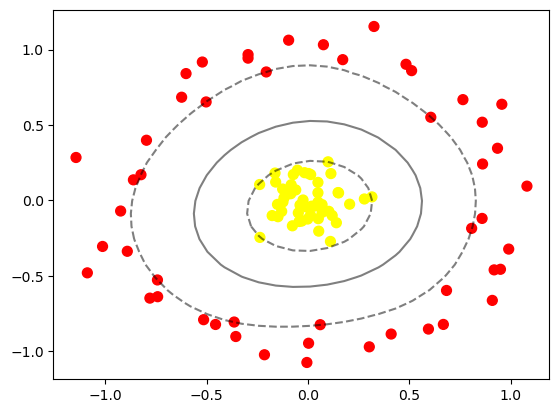

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**Data Overlap**

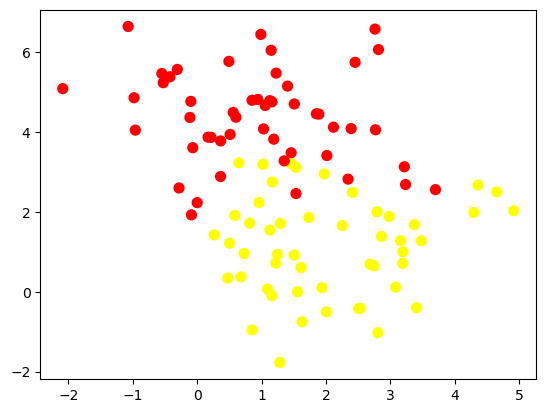

In [27]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Untuk mengatasi data yang overlap dapat menggunakan teknik penghalusan margin pada SVM. Teknik ini berfungsi untuk menghasilkan fitting yang lebih baik dengan cara memasukkan beberapa titik data ke dalam margin. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning dikenal sebagai C

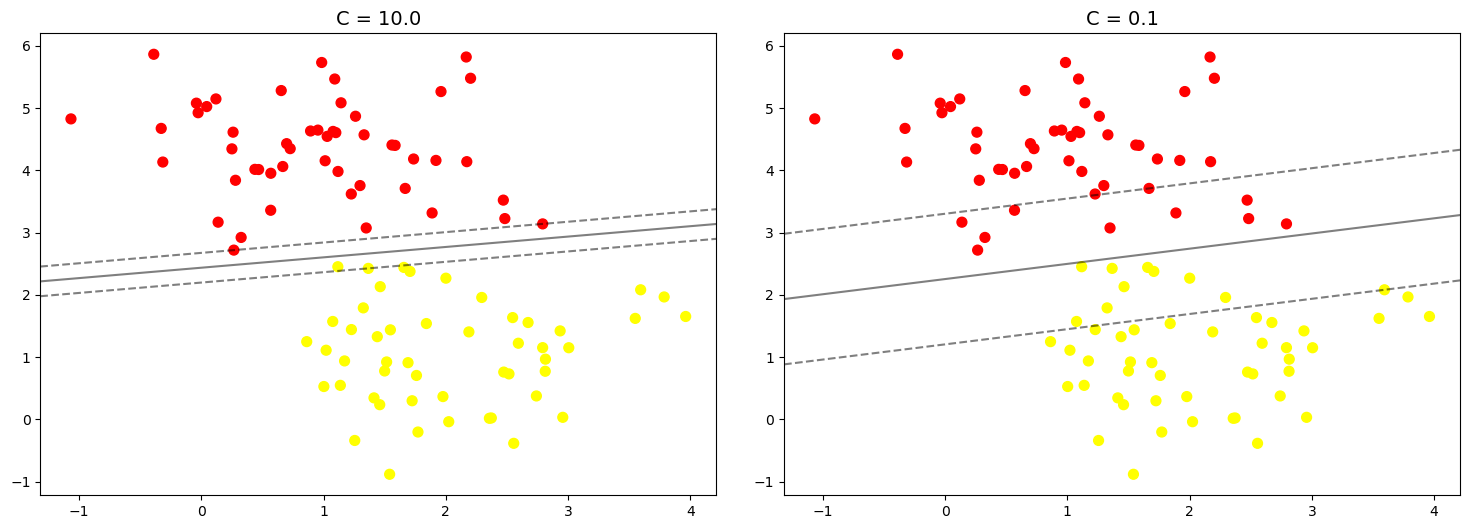

In [28]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)